In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
data = pd.read_excel("Assignment_Data_vF.xls")
data.head()

,DATE,Open,High,Low,Close,Adj Close,Volume
0,1,9646.700195,9647.049805,9598.500000,9616.400391,9616.400391,141400.0
1,2,9615.549805,9654.150391,9595.400391,9606.900391,9606.900391,129700.0
2,3,9621.549805,9627.400391,9580.450195,9618.150391,9618.150391,181800.0
3,4,9617.900391,9621.400391,9560.799805,9578.049805,9578.049805,171100.0
4,5,9595.450195,9615.849609,9565.500000,9588.049805,9588.049805,213200.0


In [3]:
data.isnull().sum()

DATE         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [4]:
data['Open'] = data['Open'].fillna(data['Open'].mean())
data['High'] = data['High'].fillna(data['High'].mean())
data['Low'] = data['Low'].fillna(data['Low'].mean())
data['Close'] = data['Close'].fillna(data['Close'].mean())
data['Adj Close'] = data['Adj Close'].fillna(data['Adj Close'].mean())
data['Volume'] = data['Volume'].fillna(data['Volume'].mean())

In [5]:
data.isnull().sum()

DATE         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.head()

,DATE,Open,High,Low,Close,Adj Close,Volume
0,1,9646.700195,9647.049805,9598.500000,9616.400391,9616.400391,141400.0
1,2,9615.549805,9654.150391,9595.400391,9606.900391,9606.900391,129700.0
2,3,9621.549805,9627.400391,9580.450195,9618.150391,9618.150391,181800.0
3,4,9617.900391,9621.400391,9560.799805,9578.049805,9578.049805,171100.0
4,5,9595.450195,9615.849609,9565.500000,9588.049805,9588.049805,213200.0


In [7]:
data.shape

(1167, 7)

In [8]:
df = data.reset_index()['Close']
df

0        9616.400391
1        9606.900391
2        9618.150391
3        9578.049805
4        9588.049805
            ...     
1162    17092.199219
1163    17063.250000
1164    16247.950195
1165    16658.400391
1166    16793.900391
Name: Close, Length: 1167, dtype: float64

In [9]:
df.shape

(1167,)

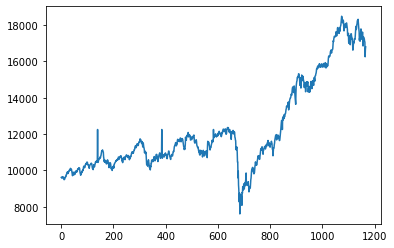

In [10]:
import matplotlib.pyplot as plt
plt.plot(df)

In [11]:
# LSTM are very sensitive to data , So we use MinMaxScaler to normalize it

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
df

array([[0.18461279],
       [0.18373857],
       [0.18477383],
       ...,
       [0.79487058],
       [0.8326416 ],
       [0.84511077]])

In [13]:
# Splitting the data into train and test data
training_size = int(len(df)*0.65)
test_size = len(df)- training_size

In [14]:
train_data , test_data = df[0:training_size, :] , df[training_size:len(df) , :1]

In [15]:
print(train_data.shape)
print(test_data.shape)

(758, 1)
(409, 1)


In [16]:
print(len(train_data))
print(len(test_data))

758
409


In [17]:
# Convert array of values into dataset matrix
def create_dataset(dataset , time_step = 1):
    dataX , dataY = [] , []
    
    for i in range(len(dataset)-time_step-1):
        a = dataset[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
        

In [18]:
time_step = 100
X_train , y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data , time_step)

In [19]:
X_train

array([[0.18461279, 0.18373857, 0.18477383, ..., 0.26044924, 0.25891243,
        0.26155352],
       [0.18373857, 0.18477383, 0.18108364, ..., 0.25891243, 0.26155352,
        0.26148909],
       [0.18477383, 0.18108364, 0.18200387, ..., 0.26155352, 0.26148909,
        0.25213496],
       ...,
       [0.41665438, 0.4130102 , 0.40685848, ..., 0.27068226, 0.27580331,
        0.29018664],
       [0.4130102 , 0.40685848, 0.4138891 , ..., 0.27580331, 0.29018664,
        0.29349948],
       [0.40685848, 0.4138891 , 0.42247487, ..., 0.29018664, 0.29349948,
        0.28485845]])

In [20]:
y_train

array([0.26148909, 0.25213496, 0.24780986, 0.24834358, 0.24952146,
       0.24061361, 0.23708446, 0.23077627, 0.23967496, 0.24601073,
       0.24740492, 0.24999542, 0.25141252, 0.25200609, 0.25577447,
       0.25668086, 0.2539846 , 0.25316097, 0.24076081, 0.23112136,
       0.23166892, 0.2307947 , 0.22397113, 0.23525325, 0.24435898,
       0.24956747, 0.24201239, 0.23766886, 0.24311199, 0.25057973,
       0.25568703, 0.26253819, 0.26078974, 0.26043082, 0.26528047,
       0.26882337, 0.26507342, 0.26389095, 0.26874977, 0.42703556,
       0.2606057 , 0.26069772, 0.26636633, 0.27134017, 0.27729869,
       0.27853184, 0.27809014, 0.27983859, 0.28260387, 0.28815287,
       0.28437074, 0.29247797, 0.29509605, 0.30224629, 0.30882596,
       0.31963871, 0.31985035, 0.3183458 , 0.32393622, 0.31650533,
       0.3144854 , 0.31349157, 0.2899059 , 0.28125111, 0.26576359,
       0.2637805 , 0.27299659, 0.261779  , 0.26958256, 0.26600749,
       0.2701117 , 0.2615351 , 0.25473462, 0.2530782 , 0.25648

In [21]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(657, 100) (657,)
(308, 100) (308,)


In [22]:
# Reshape inputs required to create LSTM model
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences = True , input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train, y_train , validation_data = (X_test , y_test), epochs = 100 , batch_size = 64 , verbose = 1)

Epoch 1/100
11/11 [==============================] - 8s 335ms/step - loss: 0.0307 - val_loss: 0.0785
Epoch 2/100
11/11 [==============================] - 3s 274ms/step - loss: 0.0054 - val_loss: 0.0436
Epoch 3/100
11/11 [==============================] - 3s 253ms/step - loss: 0.0031 - val_loss: 0.0743
Epoch 4/100
11/11 [==============================] - 3s 232ms/step - loss: 0.0025 - val_loss: 0.0457
Epoch 5/100
11/11 [==============================] - 3s 267ms/step - loss: 0.0022 - val_loss: 0.0528
Epoch 6/100
11/11 [==============================] - 3s 252ms/step - loss: 0.0020 - val_loss: 0.0393
Epoch 7/100
11/11 [==============================] - 3s 244ms/step - loss: 0.0019 - val_loss: 0.0273
Epoch 8/100
11/11 [==============================] - 3s 235ms/step - loss: 0.0018 - val_loss: 0.0214
Epoch 9/100
11/11 [==============================] - 3s 269ms/step - loss: 0.0017 - val_loss: 0.0157
Epoch 10/100
11/11 [==============================] - 3s 263ms/step - loss: 0.0016 - val_lo

11/11 [==============================] - 3s 238ms/step - loss: 5.0261e-04 - val_loss: 0.1053
Epoch 80/100
11/11 [==============================] - 3s 254ms/step - loss: 4.8321e-04 - val_loss: 0.0796
Epoch 81/100
11/11 [==============================] - 3s 263ms/step - loss: 4.9135e-04 - val_loss: 0.1080
Epoch 82/100
11/11 [==============================] - 3s 252ms/step - loss: 4.4396e-04 - val_loss: 0.1021
Epoch 83/100
11/11 [==============================] - 3s 254ms/step - loss: 4.4602e-04 - val_loss: 0.0973
Epoch 84/100
11/11 [==============================] - 3s 249ms/step - loss: 4.7175e-04 - val_loss: 0.0963
Epoch 85/100
11/11 [==============================] - 3s 265ms/step - loss: 4.4132e-04 - val_loss: 0.1060
Epoch 86/100
11/11 [==============================] - 3s 266ms/step - loss: 4.4075e-04 - val_loss: 0.0977
Epoch 87/100
11/11 [==============================] - 3s 262ms/step - loss: 4.3820e-04 - val_loss: 0.0888
Epoch 88/100
11/11 [==============================] - 3s 26

In [27]:
# Predictions for train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [28]:
# transform back to the orignal form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [29]:
# Calculate RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, test_predict))

19079.851952612935

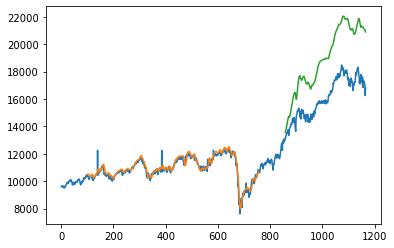

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
x_input=test_data[308:].reshape(1,-1)
x_input.shape

(1, 101)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
len(temp_input)

101

In [34]:
temp_input

[0.9397476761380595,
 0.9235238781175553,
 0.9368074205242946,
 0.9464560385594499,
 0.9511262263196537,
 0.9553593029101833,
 0.9709849488037651,
 0.9872547585263401,
 1.0,
 0.9946349636682456,
 0.9806335667468974,
 0.9724894954803348,
 0.9666736883008656,
 0.9676399340443561,
 0.9807992808366547,
 0.9755124284172701,
 0.9429638222425417,
 0.9258843144149472,
 0.9496263526835699,
 0.9458808922835628,
 0.9403824938860813,
 0.9484438878294735,
 0.9624084394080142,
 0.960172198817086,
 0.9576828938647676,
 0.9444683689191117,
 0.96555556795939,
 0.9661720528968624,
 0.9560264725902125,
 0.9467736271551693,
 0.9344563303998975,
 0.9024091799074642,
 0.9103967035355555,
 0.9022711448012511,
 0.9134243095129765,
 0.8665107062111325,
 0.8690413498250361,
 0.8625306939819933,
 0.8794355011742988,
 0.9010379952966213,
 0.8821776907662991,
 0.8560017053284009,
 0.8803372226834602,
 0.907304753137537,
 0.9116390194914717,
 0.9111283974499137,
 0.8979643776171292,
 0.8939751990287267,
 0.88445077

In [35]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print temp_input
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.92352388 0.93680742 0.94645604 0.95112623 0.9553593  0.97098495
 0.98725476 1.         0.99463496 0.98063357 0.9724895  0.96667369
 0.96763993 0.98079928 0.97551243 0.94296382 0.92588431 0.94962635
 0.94588089 0.94038249 0.94844389 0.96240844 0.9601722  0.95768289
 0.94446837 0.96555557 0.96617205 0.95602647 0.94677363 0.93445633
 0.90240918 0.9103967  0.90227114 0.91342431 0.86651071 0.86904135
 0.86253069 0.8794355  0.901038   0.88217769 0.85600171 0.88033722
 0.90730475 0.91163902 0.9111284  0.89796438 0.8939752  0.88445078
 0.88693541 0.86271474 0.82857406 0.84298956 0.85997704 0.87075762
 0.86442185 0.87201378 0.88554122 0.88373292 0.88284486 0.89665772
 0.92165573 0.93817861 0.94922141 0.93271705 0.93886411 0.95640391
 0.96123047 0.9756413  0.97982387 0.97963515 0.98445254 0.96650348
 0.95043156 0.93373848 0.92086904 0.87779741 0.88965459 0.87421317
 0.87345847 0.89535088 0.91716042 0.93585501 0.9156282  0.91158851
 0.88373292 0.888624   0.90675729 0.9198291  0.898

8 day output [[1.6164057]]
9 day input [0.98063357 0.9724895  0.96667369 0.96763993 0.98079928 0.97551243
 0.94296382 0.92588431 0.94962635 0.94588089 0.94038249 0.94844389
 0.96240844 0.9601722  0.95768289 0.94446837 0.96555557 0.96617205
 0.95602647 0.94677363 0.93445633 0.90240918 0.9103967  0.90227114
 0.91342431 0.86651071 0.86904135 0.86253069 0.8794355  0.901038
 0.88217769 0.85600171 0.88033722 0.90730475 0.91163902 0.9111284
 0.89796438 0.8939752  0.88445078 0.88693541 0.86271474 0.82857406
 0.84298956 0.85997704 0.87075762 0.86442185 0.87201378 0.88554122
 0.88373292 0.88284486 0.89665772 0.92165573 0.93817861 0.94922141
 0.93271705 0.93886411 0.95640391 0.96123047 0.9756413  0.97982387
 0.97963515 0.98445254 0.96650348 0.95043156 0.93373848 0.92086904
 0.87779741 0.88965459 0.87421317 0.87345847 0.89535088 0.91716042
 0.93585501 0.9156282  0.91158851 0.88373292 0.888624   0.90675729
 0.9198291  0.89856253 0.84961075 0.89651034 0.89372663 0.89210705
 0.8895029  0.88309343 0.8

17 day output [[1.9532635]]
18 day input [0.94588089 0.94038249 0.94844389 0.96240844 0.9601722  0.95768289
 0.94446837 0.96555557 0.96617205 0.95602647 0.94677363 0.93445633
 0.90240918 0.9103967  0.90227114 0.91342431 0.86651071 0.86904135
 0.86253069 0.8794355  0.901038   0.88217769 0.85600171 0.88033722
 0.90730475 0.91163902 0.9111284  0.89796438 0.8939752  0.88445078
 0.88693541 0.86271474 0.82857406 0.84298956 0.85997704 0.87075762
 0.86442185 0.87201378 0.88554122 0.88373292 0.88284486 0.89665772
 0.92165573 0.93817861 0.94922141 0.93271705 0.93886411 0.95640391
 0.96123047 0.9756413  0.97982387 0.97963515 0.98445254 0.96650348
 0.95043156 0.93373848 0.92086904 0.87779741 0.88965459 0.87421317
 0.87345847 0.89535088 0.91716042 0.93585501 0.9156282  0.91158851
 0.88373292 0.888624   0.90675729 0.9198291  0.89856253 0.84961075
 0.89651034 0.89372663 0.89210705 0.8895029  0.88309343 0.87256125
 0.86989724 0.79487058 0.8326416  0.84511077 1.20269561 1.22792637
 1.27522445 1.3332790

26 day output [[2.1371021]]
27 day input [0.95602647 0.94677363 0.93445633 0.90240918 0.9103967  0.90227114
 0.91342431 0.86651071 0.86904135 0.86253069 0.8794355  0.901038
 0.88217769 0.85600171 0.88033722 0.90730475 0.91163902 0.9111284
 0.89796438 0.8939752  0.88445078 0.88693541 0.86271474 0.82857406
 0.84298956 0.85997704 0.87075762 0.86442185 0.87201378 0.88554122
 0.88373292 0.88284486 0.89665772 0.92165573 0.93817861 0.94922141
 0.93271705 0.93886411 0.95640391 0.96123047 0.9756413  0.97982387
 0.97963515 0.98445254 0.96650348 0.95043156 0.93373848 0.92086904
 0.87779741 0.88965459 0.87421317 0.87345847 0.89535088 0.91716042
 0.93585501 0.9156282  0.91158851 0.88373292 0.888624   0.90675729
 0.9198291  0.89856253 0.84961075 0.89651034 0.89372663 0.89210705
 0.8895029  0.88309343 0.87256125 0.86989724 0.79487058 0.8326416
 0.84511077 1.20269561 1.22792637 1.27522445 1.33327901 1.39450932
 1.45474064 1.51209068 1.56597018 1.61640573 1.6636554  1.70801699
 1.74975038 1.78905714 1.

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
len(df)

1167

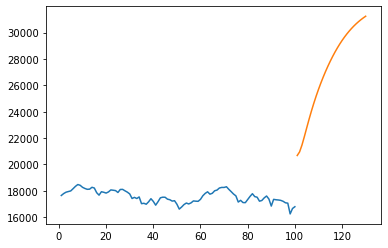

In [38]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df[1067:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

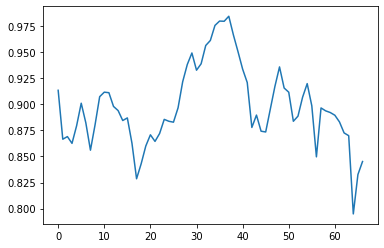

In [39]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df[1100:])

In [40]:
df1=scaler.inverse_transform(df1).tolist()

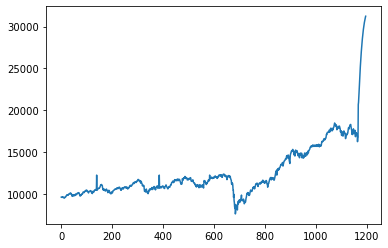

In [41]:
plt.plot(df1)

In [65]:
xls = "C://Users//DELL//Assignment 19-06-2022//Assignment_Data_vF.xls"
df2 = pd.read_excel(xls,'Output_File_To_Predict')

In [83]:
submission = pd.DataFrame({'DATE': df2['DATE'],'NIFTY_PREDICTION':lst_output})

In [84]:
submission['NIFTY_PREDICTION'] = submission['NIFTY_PREDICTION'].str[0]

In [85]:
submission

,DATE,NIFTY_PREDICTION
0,1168,1.202696
1,1169,1.227926
2,1170,1.275224
3,1171,1.333279
4,1172,1.394509
5,1173,1.454741
6,1174,1.512091
7,1175,1.565970
8,1176,1.616406
9,1177,1.663655


In [86]:
submission.to_csv('final_submission.csv', index = False)